# Your Uni : ty2542, pc3140, xx2473. (Also change Uni in the title of your notebook)
# Your Full name : Helen Yu, Peiyuan Chen, Xinyuan Xu
# Link to your Public Github repository with Final report  : Fill here


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
whr_df = pd.read_csv('WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [ ]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes


Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?





In [ ]:
# Your answer:
# Print first few values of y_train and y_train_labels to compare
print("y_train (categorical):")
print(y_train.head())

print("\nNumerical encoding of y_train (y_train_labels):")
print(y_train_labels.head())

# Check the mapping of categories to codes
print("\nCategory to code mapping:")
print(y_train.astype('category').cat.categories)

y_train (categorical):
126    Very Low
102         Low
60      Average
79      Average
91          Low
Name: happiness_category, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Average' < 'High' < 'Very High']

Numerical encoding of y_train (y_train_labels):
126    0
102    1
60     2
79     2
91     1
dtype: int8

Category to code mapping:
Index(['Very Low', 'Low', 'Average', 'High', 'Very High'], dtype='object')


y_train (categorical) contains the original labels as text: 'Very Low', 'Low', 'Average', 'High', and 'Very High'. It is stored as a categorical data type in Pandas, with an inherent order ('Very Low' < 'Low' < 'Average' < 'High' < 'Very High').

y_train_labels (numerical encoding) converts these categories into integer values:
'Very Low' → 0
'Low' → 1
'Average' → 2
'High' → 3
'Very High' → 4

This numerical encoding allows categorical labels to be used in machine learning models that require numerical inputs.

<h3> Add new data

In [ ]:
# Load the dataset
countrydata = pd.read_csv('newcountryvars.csv')

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [ ]:
import pandas as pd

# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

# Ensure column names match before merging
X_train = X_train.merge(countrydata, left_on='country', right_on='country_name', how='left').drop(columns=['country_name'])
X_test = X_test.merge(countrydata, left_on='country', right_on='country_name', how='left').drop(columns=['country_name'])

# Display first few rows to verify the merge
print(X_train.head())
print(X_test.head())

      country                              region  gdp_per_capita  \
0  Madagascar                  Sub-Saharan Africa           0.632   
1  Mauritania                  Sub-Saharan Africa           1.099   
2    Mongolia                           East Asia           1.379   
3  Tajikistan  Commonwealth of Independent States           0.972   
4     Ukraine          Central and Eastern Europe           1.358   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0           0.779                    0.178                         0.187   
1           0.764                    0.244                         0.320   
2           1.494                    0.244                         0.425   
3           1.248                    0.291                         0.599   
4           1.354                    0.355                         0.551   

   generosity  perceptions_of_corruption  population  \
0       0.177                      0.134  25570895.0   
1       0.130   

In [ ]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [ ]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [ ]:
## Your answer:

Categorical variables (object type):

country
region_x
region_y
These columns contain text data, which might need encoding (e.g., one-hot encoding or label encoding) if they are used in a machine learning model.
Numerical variables (float64 type):

These include gdp_per_capita_x, social_support_x, healthy_life_expectancy_x, freedom_to_make_life_choices_x, generosity_x, perceptions_of_corruption_x, and their corresponding _y versions.
happiness_score is also a numerical variable but was initially removed from X_train since it is the target variable.

Find out the number and percentage of missing values in the table per column

In [ ]:
# Calculate the number of missing values per column
missing_values = X_train.isnull().sum()

# Calculate the percentage of missing values per column
missing_percentage = (missing_values / len(X_train)) * 100

# Combine results into a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Display the missing values table
print(missing_df)


                               Missing Values  Percentage (%)
country                                     0        0.000000
region                                      0        0.000000
gdp_per_capita                              0        0.000000
social_support                              0        0.000000
healthy_life_expectancy                     0        0.000000
freedom_to_make_life_choices                0        0.000000
generosity                                  0        0.000000
perceptions_of_corruption                   0        0.000000
population                                  6        6.315789
population_below_poverty_line              16       16.842105
hdi                                         6        6.315789
life_expectancy                             7        7.368421
expected_years_of_schooling                 7        7.368421
mean_years_of_schooling                     7        7.368421
gni                                         7        7.368421


Plot the frequency distribution / histogram of some of the numerical features that you think are important

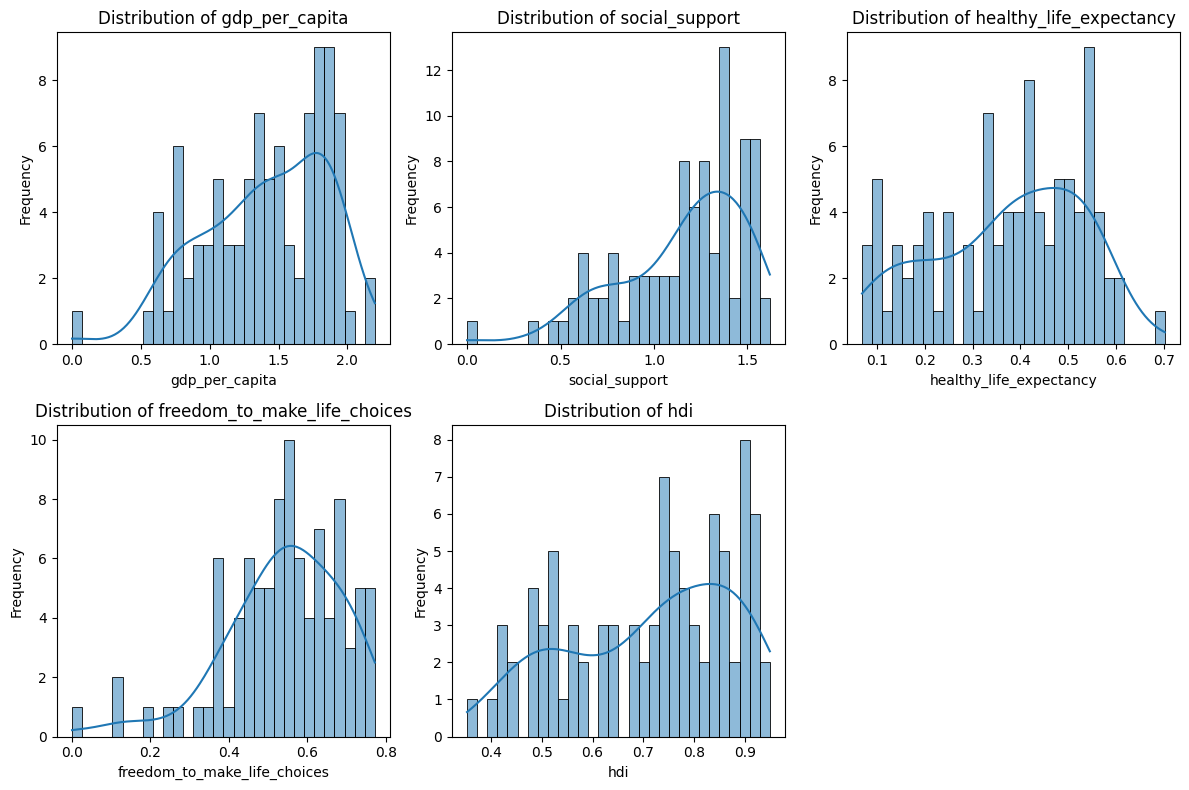

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of selected numerical features
num_features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'hdi']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train[feature].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/282126324.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X_train[feature], palette='viridis', order=X_train[feature].value_counts().index)
/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/282126324.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=X_train[feature], palette='viridis', order=top_countries.index)


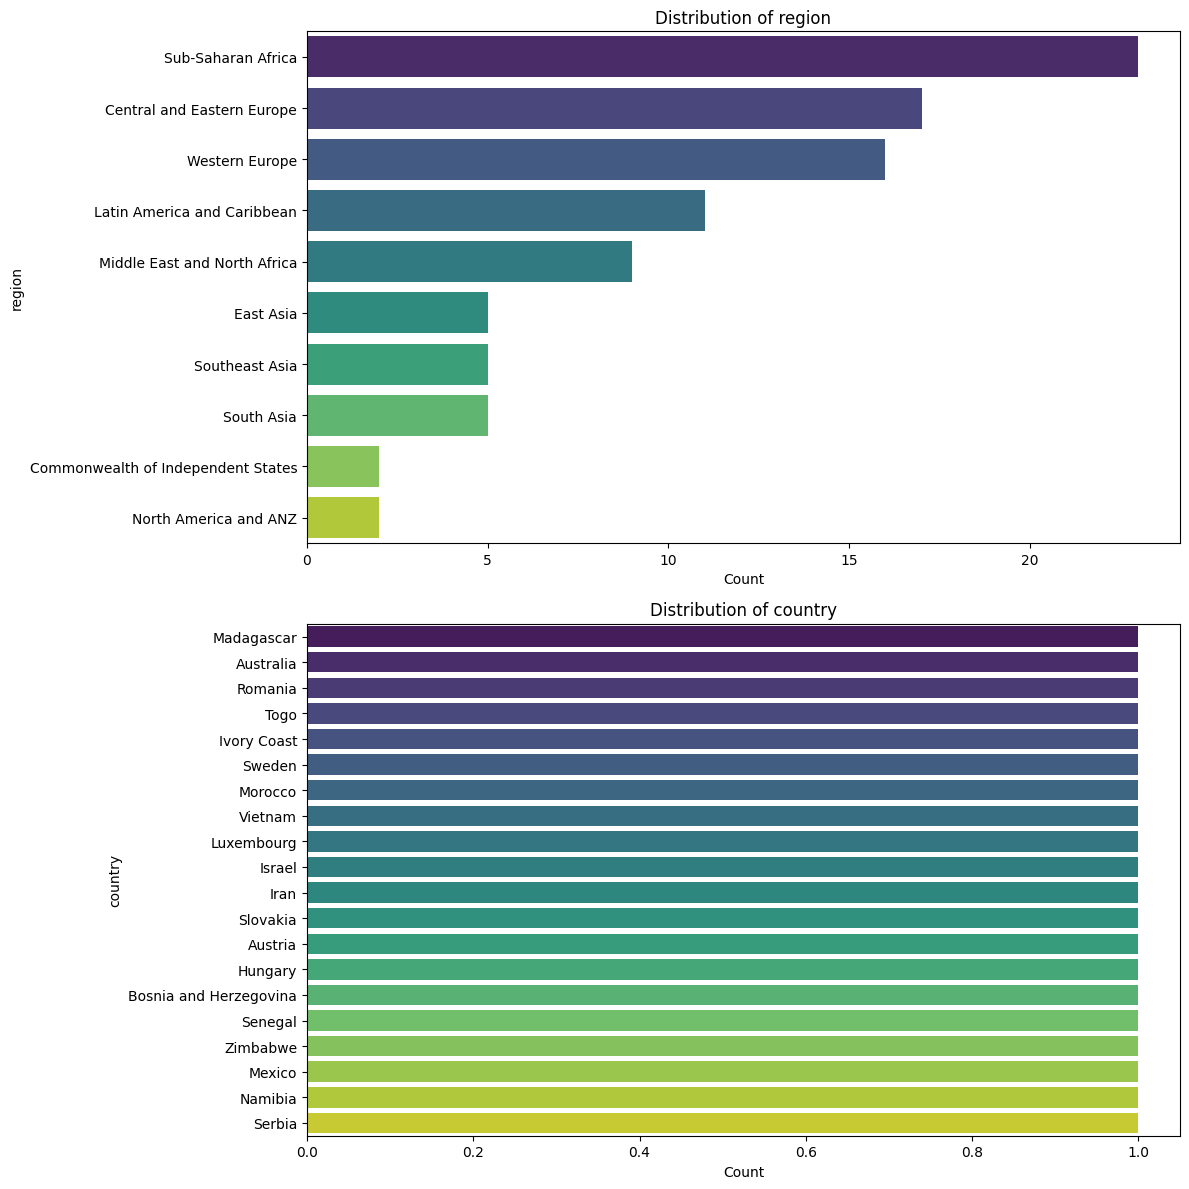

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical variables
categorical_features = ['region', 'country']  # You can add more if necessary

plt.figure(figsize=(12, 6 * len(categorical_features)))  # Adjust figure size dynamically

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)  # Arrange subplots vertically
    if feature == 'country':
        top_countries = X_train['country'].value_counts().nlargest(20)  # Show top 20 countries
        sns.countplot(y=X_train[feature], palette='viridis', order=top_countries.index)
    else:
        sns.countplot(y=X_train[feature], palette='viridis', order=X_train[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

In [ ]:
# Your code here:
# Select numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrices
pearson_corr = numerical_features.corr(method='pearson')   # Linear relationships
spearman_corr = numerical_features.corr(method='spearman') # Monotonic relationships
kendall_corr = numerical_features.corr(method='kendall')   # Rank-based relationships

# Display the correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

print("\nKendall Correlation Matrix:")
print(kendall_corr)

Pearson Correlation Matrix:
                               gdp_per_capita  social_support  \
gdp_per_capita                       1.000000        0.769394   
social_support                       0.769394        1.000000   
healthy_life_expectancy              0.860164        0.771294   
freedom_to_make_life_choices         0.483145        0.571646   
generosity                          -0.115580        0.084327   
perceptions_of_corruption            0.432076        0.301807   
population                          -0.045583       -0.109651   
population_below_poverty_line       -0.620790       -0.605304   
hdi                                  0.902386        0.855297   
life_expectancy                      0.830886        0.774096   
expected_years_of_schooling          0.820940        0.809587   
mean_years_of_schooling              0.815423        0.845490   
gni                                  0.834177        0.667188   

                               healthy_life_expectancy  \
gdp

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

In [ ]:
# Your plotting code(s) here:
# Compute correlation of numerical features with the target (y_train_labels)
correlations_with_target = numerical_features.corrwith(y_train_labels)

# Display correlation with target variable
print("Correlation of Features with Target (Happiness Category):")
print(correlations_with_target)

Correlation of Features with Target (Happiness Category):
gdp_per_capita                  -0.016241
social_support                  -0.038729
healthy_life_expectancy         -0.024684
freedom_to_make_life_choices    -0.017659
generosity                      -0.010237
perceptions_of_corruption        0.162115
population                      -0.264719
population_below_poverty_line    0.079533
hdi                             -0.009183
life_expectancy                 -0.004647
expected_years_of_schooling      0.024791
mean_years_of_schooling         -0.001661
gni                              0.017251
dtype: float64


/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/1708622824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train_labels, y=numerical_features[feature], palette='Set2')
/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/1708622824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train_labels, y=numerical_features[feature], palette='Set2')
/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/1708622824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train_labels, y=numerical_

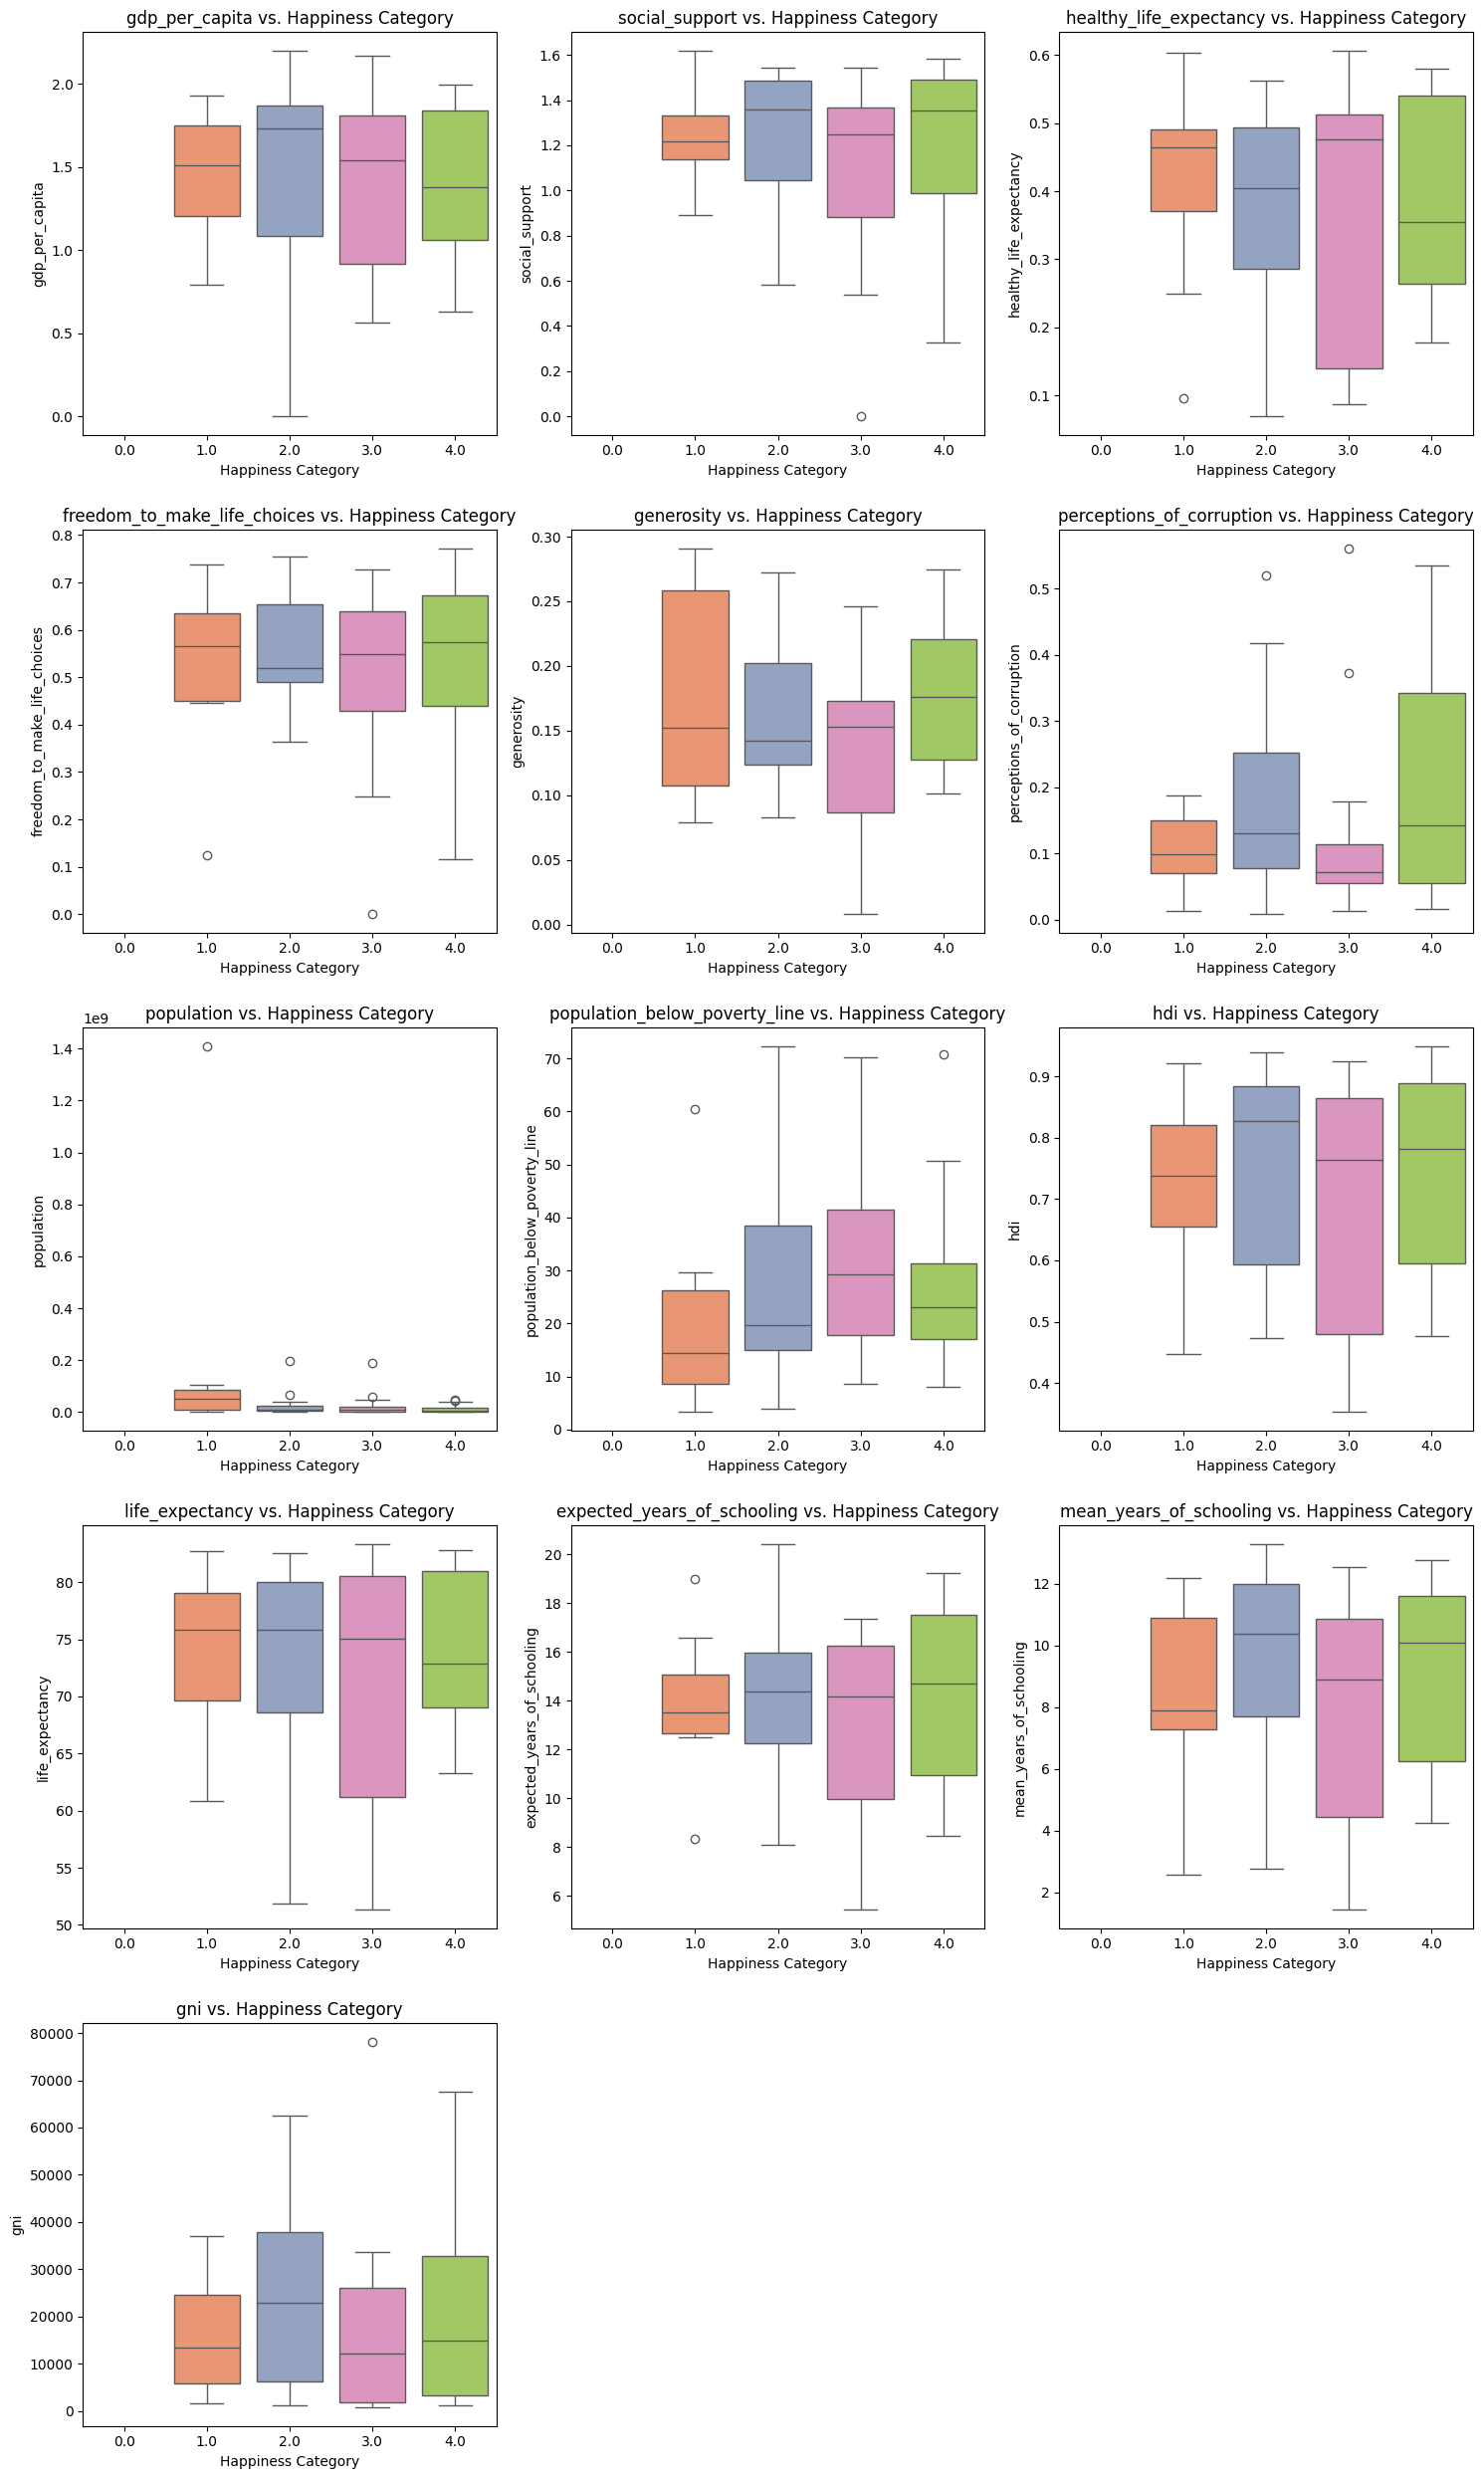

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Set up the plot grid
# Adjusted grid size to accommodate all features
num_features = len(numerical_features.columns)
num_cols = 3  # Number of columns in the grid
num_rows = int(np.ceil(num_features / num_cols))  # Calculate rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on rows

# Bivariate analysis: Plot numerical features against the target variable
for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated rows and columns
    sns.boxplot(x=y_train_labels, y=numerical_features[feature], palette='Set2')
    plt.title(f'{feature} vs. Happiness Category')
    plt.xlabel('Happiness Category')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Compute Spearman correlation
spearman_corr_with_target = numerical_features.corrwith(y_train_labels, method='spearman')

# Compute Kendall correlation
kendall_corr_with_target = numerical_features.corrwith(y_train_labels, method='kendall')

# Display Spearman and Kendall correlations with the target
print("\nSpearman Correlation with Target:")
print(spearman_corr_with_target)

print("\nKendall Correlation with Target:")
print(kendall_corr_with_target)


Spearman Correlation with Target:
gdp_per_capita                  -0.013474
social_support                   0.048397
healthy_life_expectancy          0.018047
freedom_to_make_life_choices     0.009483
generosity                       0.025733
perceptions_of_corruption        0.058748
population                      -0.232541
population_below_poverty_line    0.127085
hdi                              0.020882
life_expectancy                 -0.013312
expected_years_of_schooling      0.074950
mean_years_of_schooling         -0.026189
gni                             -0.029662
dtype: float64

Kendall Correlation with Target:
gdp_per_capita                  -0.009506
social_support                   0.039741
healthy_life_expectancy          0.024652
freedom_to_make_life_choices     0.006154
generosity                       0.024628
perceptions_of_corruption        0.034745
population                      -0.183936
population_below_poverty_line    0.088622
hdi                              0

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/4275960100.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=numerical_features[feature], palette='Set2')
/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/4275960100.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=numerical_features[feature], palette='Set2')
/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/4275960100.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=numerical_features[feature], palette='Set2')
/var/folders/mg/tbk

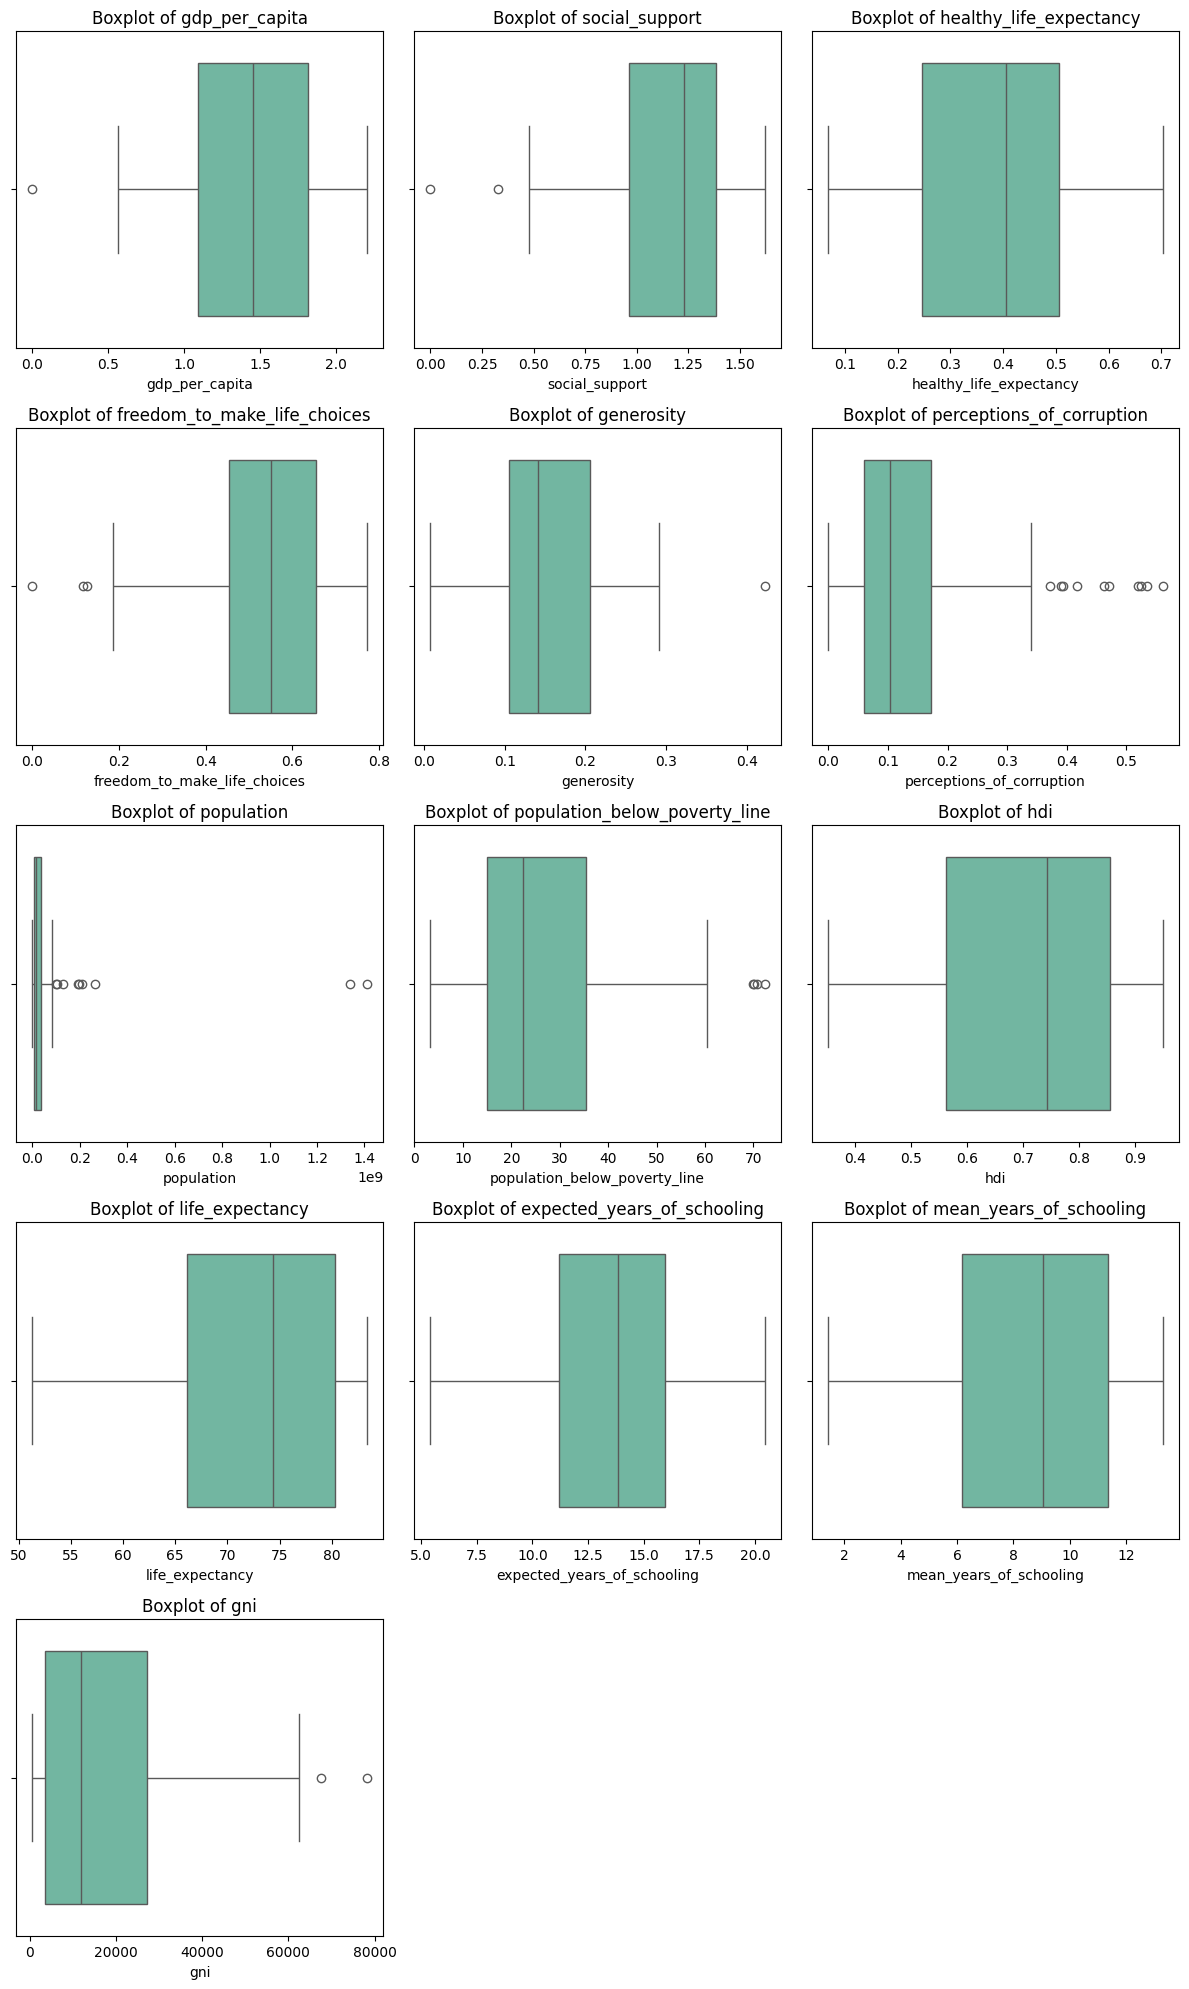

In [ ]:
# Your code here:
# Set up the plot grid
# Calculate the required grid dimensions based on the number of features
num_features = len(numerical_features.columns)
num_cols = 3  # You can change the number of columns as needed
num_rows = int(np.ceil(num_features / num_cols))  # Calculate rows needed

plt.figure(figsize=(12, 4 * num_rows))  # Adjust figure size for better visualization

# Bivariate analysis: Plot boxplots for numerical features to detect outliers
for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated rows and columns
    sns.boxplot(x=numerical_features[feature], palette='Set2')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for numerical features
z_scores = numerical_features.apply(zscore)

# Identify rows where the Z-score is greater than 3 or less than -3
outliers_zscore = (z_scores.abs() > 3).sum(axis=0)

# Print the number of outliers in each feature based on Z-score
print("Number of outliers detected using Z-score:")
print(outliers_zscore)

Number of outliers detected using Z-score:
gdp_per_capita                   1
social_support                   1
healthy_life_expectancy          0
freedom_to_make_life_choices     1
generosity                       1
perceptions_of_corruption        1
population                       0
population_below_poverty_line    0
hdi                              0
life_expectancy                  0
expected_years_of_schooling      0
mean_years_of_schooling          0
gni                              0
dtype: int64


In [ ]:
# Calculate IQR for numerical features
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers_iqr = ((numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))).sum(axis=0)

# Print the number of outliers detected using IQR
print("Number of outliers detected using IQR method:")
print(outliers_iqr)

Number of outliers detected using IQR method:
gdp_per_capita                    1
social_support                    2
healthy_life_expectancy           0
freedom_to_make_life_choices      3
generosity                        1
perceptions_of_corruption        10
population                        9
population_below_poverty_line     4
hdi                               0
life_expectancy                   0
expected_years_of_schooling       0
mean_years_of_schooling           0
gni                               2
dtype: int64


Write what you observed and your General comments on what should be done:

In [ ]:
# Your comments here

## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

In [ ]:
# Your code here:
import numpy as np
import pandas as pd

# Assuming numerical_features contains all numerical columns in the dataset

# Check the skewness of each numerical feature
skewness = numerical_features.skew()
print("Skewness before log transformation:")
print(skewness)

# Apply log transformation to skewed features (only positive values)
log_transformed_features = numerical_features.copy()

# We apply log transformation only to features where skewness > 1 (highly skewed)
for feature in skewness.index:
    if skewness[feature] > 1:
        # Apply log transformation
        log_transformed_features[feature] = np.log1p(numerical_features[feature])  # log1p(x) handles log(0)

# Check the skewness after log transformation
skewness_after_log = log_transformed_features.skew()
print("\nSkewness after log transformation:")
print(skewness_after_log)

Skewness before log transformation:
gdp_per_capita                  -0.547790
social_support                  -0.954425
healthy_life_expectancy         -0.367545
freedom_to_make_life_choices    -0.970893
generosity                       0.555203
perceptions_of_corruption        1.600420
population                       6.058979
population_below_poverty_line    1.074529
hdi                             -0.453412
life_expectancy                 -0.632233
expected_years_of_schooling     -0.206557
mean_years_of_schooling         -0.437315
gni                              1.270302
dtype: float64

Skewness after log transformation:
gdp_per_capita                  -0.547790
social_support                  -0.954425
healthy_life_expectancy         -0.367545
freedom_to_make_life_choices    -0.970893
generosity                       0.555203
perceptions_of_corruption        1.393357
population                       0.172724
population_below_poverty_line   -0.436395
hdi                            

Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [ ]:
import numpy as np
import pandas as pd

# Assuming X_train is your training DataFrame and numerical_features contains all numerical columns
numerical_features = X_train.select_dtypes(include=[np.number])  # Selecting numerical features if not defined

# Check the skewness of each numerical feature
skewness = numerical_features.skew()
print("Skewness before log transformation:")
print(skewness)

# Apply log transformation to skewed features (only positive values)
log_transformed_features = numerical_features.copy()

# We apply log transformation only to features where skewness > 1 (highly skewed)
for feature in skewness.index:
    if skewness[feature] > 1:
        # Apply log transformation
        log_transformed_features[feature] = np.log1p(numerical_features[feature])  # log1p(x) handles log(0)

# Check the skewness after log transformation
skewness_after_log = log_transformed_features.skew()
print("\nSkewness after log transformation:")
print(skewness_after_log)

# Create an interaction feature between 'gdp_per_capita_x' and 'social_support_x'
if 'gdp_per_capita_x' in X_train.columns and 'social_support_x' in X_train.columns:
    X_train['gdp_social_interaction'] = X_train['gdp_per_capita_x'] * X_train['social_support_x']
    # Optionally, inspect the first few rows of the new feature to verify it was created correctly
    print("\nFirst few rows with new interaction feature:")
    print(X_train[['gdp_per_capita_x', 'social_support_x', 'gdp_social_interaction']].head())
else:
    print("\nThe required columns 'gdp_per_capita_x' and 'social_support_x' are missing.")


Skewness before log transformation:
gdp_per_capita                  -0.547790
social_support                  -0.954425
healthy_life_expectancy         -0.367545
freedom_to_make_life_choices    -0.970893
generosity                       0.555203
perceptions_of_corruption        1.600420
population                       6.058979
population_below_poverty_line    1.074529
hdi                             -0.453412
life_expectancy                 -0.632233
expected_years_of_schooling     -0.206557
mean_years_of_schooling         -0.437315
gni                              1.270302
dtype: float64

Skewness after log transformation:
gdp_per_capita                  -0.547790
social_support                  -0.954425
healthy_life_expectancy         -0.367545
freedom_to_make_life_choices    -0.970893
generosity                       0.555203
perceptions_of_corruption        1.393357
population                       0.172724
population_below_poverty_line   -0.436395
hdi                            

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

# Select numerical features using select_dtypes
numeric_features = X_train.select_dtypes(include=['number']).columns # Selects numerical features

# Convert to list
numeric_features = numeric_features.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

# Assuming 'region' is present in your X_train, correct the categorical_features
# 'region_x' and 'region_y' were likely created during a merge and then dropped
categorical_features = ['region']  # Corrected feature names

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## Your answer :

1. Selecting Numerical Features:

What we’re doing:

We are selecting the numerical columns from X_train using the select_dtypes method. This will filter out columns that are not numerical (i.e., strings or categorical values) and only keep the numeric ones (e.g., integers or floats).

The .columns gives the column names, and .tolist() converts the column names to a list.

Why:

This ensures that we apply the necessary transformations (like scaling or imputation) only to the numerical columns, not to the categorical ones. In machine learning workflows, it’s crucial to treat numerical and categorical data differently to get the best preprocessing results.

In [ ]:
numeric_features = X_train.select_dtypes(include=['number']).columns # Selects numerical features
numeric_features = numeric_features.tolist()

2. Creating a Pipeline for Numerical Features (numeric_transformer):

What we’re doing:

Imputation: We are using SimpleImputer to handle missing values in the numerical columns. The imputer is set to replace any missing values with 0 using the strategy constant with fill_value=0.
Scaling: We use StandardScaler to standardize the numerical data. This scales the data so that each feature has a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms that are sensitive to the scale of input features (e.g., linear models, support vector machines).

Why:

Imputation with 0: Replacing missing values with 0 can be a reasonable approach when we believe that missing values represent a lack of the feature's value (e.g., zero income, no purchases). However, using the mean or median might be more appropriate depending on the nature of the data.
Scaling: Scaling the numerical features ensures that no feature dominates the others due to its larger magnitude. For instance, without scaling, a feature like "income" (which might range from 10,000 to 100,000) could dominate over a feature like "age" (which might range from 20 to 100). Standardizing makes sure all features contribute equally in the model, especially for algorithms that rely on distances or gradients.


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())])

3. Creating a Pipeline for Categorical Features (categorical_transformer):

What we’re doing:

Imputation: For missing values in categorical features, we use SimpleImputer with the strategy set to 'most_frequent'. This will replace missing values with the most frequent (mode) value in the column.
One-Hot Encoding: After handling missing values, we apply OneHotEncoder to convert categorical variables into binary (0/1) columns. Each unique category value will be represented by its own column, and the corresponding row will have a 1 in the column that corresponds to the category, and 0 in others.
The parameter handle_unknown='ignore' ensures that if new categories appear during testing that were not seen during training, they will be ignored (i.e., treated as zeros instead of causing an error).

Why:

Imputation with the most frequent value: This is a common approach for categorical features where missing values are likely to represent a typical category. Replacing missing values with the mode (most frequent value) ensures that the data remains representative of the majority of the entries in the column. However, in some cases, it may be appropriate to use a placeholder like 'missing' instead of the most frequent category.
One-Hot Encoding: This technique converts categorical data into a numerical format that is easier for machine learning algorithms to process. It avoids the assumption that the model can interpret the categorical values as ordered or continuous, which could happen if you encoded them as numbers. One-hot encoding eliminates this issue by creating a separate column for each category, ensuring no ordinal relationships are inferred.

In [ ]:
categorical_features = ['region']  # Corrected feature names
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

4. Final Preprocessing Using ColumnTransformer:

What we’re doing:

We use ColumnTransformer to apply different preprocessing steps to different subsets of columns.
The numeric_transformer pipeline (which includes imputation and scaling) is applied to the numerical columns (which were selected earlier).
The categorical_transformer pipeline (which includes imputation and one-hot encoding) is applied to the region column, which is the only categorical feature here.

Why:

ColumnTransformer allows us to apply the appropriate transformations to different subsets of columns, ensuring that each feature type (numerical or categorical) is processed correctly. This modular approach makes the code cleaner and more maintainable.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  ## Is this good enough?
    ('scaler', StandardScaler())])

5. Fitting the Preprocessor on Training Data:

What we’re doing:

The fit() method applies all the transformations defined in the preprocessing pipeline to the training data (X_train). This means that the imputation strategies and scaling parameters are computed based on the training data (e.g., mean, mode, or standard deviation).

Why:

The fit() method is used to learn from the data, so we can later apply the same transformations to the test data. This step ensures that the imputation and scaling are based on the training data, preventing data leakage (i.e., using test data during training).


In [ ]:
preprocess = preprocessor.fit(X_train)

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
## Your Answer :

The "preprocessor" object is a ColumnTransformer that contains instructions on how to transform the data. It specifies the types of transformations to be applied to different types of features—numeric features undergo imputation and scaling, while categorical features are imputed with the most frequent value and one-hot encoded. The preprocessor object is used to set up these transformations without actually applying them to the data yet.

The "preprocess" object is an instance of the pipeline created by fitting the preprocessor to the training data (X_train). This object is then used to perform the actual transformation, but it has already learned how to handle the data's numerical and categorical columns based on the fit() method. Essentially, it has "learned" how to preprocess the data according to the defined steps.

The "preprocessor function" is a custom function that you write to apply the transformations to any new data you pass into it. Inside the function, you drop the unnecessary columns, apply the transformation defined by the preprocess object, and then return the transformed data. This function simplifies the process of applying the same transformations to new datasets.

Lastly, "preprocessed_data" is the result you get after running the preprocess.transform() method on the input data. This transformed data is now ready for use in model training or prediction, and it has been processed according to the rules set in the preprocessor object.

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(95, 23)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train_transformed = preprocessor(X_train)
X_test_transformed = preprocessor(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
score_4 = accuracy_score(y_test, y_pred)
print(score_4)

0.5714285714285714


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [ ]:
from sklearn.metrics import accuracy_score
prediction_labels = model.predict(preprocessor(X_test))
accuracy_5 = accuracy_score(y_test, prediction_labels)
print(accuracy_5)

0.5714285714285714


## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train_transformed = preprocessor(X_train)
X_test_transformed = preprocessor(X_test)
model2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    max_features='log2',
    bootstrap=True,
    random_state=42
)
model2.fit(X_train_transformed, y_train)
y_pred = model2.predict(X_test_transformed)
score_6 = accuracy_score(y_test, y_pred)
print(score_6)

0.5476190476190477


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In this part, I made several changes which i will list below:
First of all, I increased the number of trees in the forest from the default 100 to 500. Adding more trees generally improves the model's stability and accuracy by averaging more decision rules and reducing the variance. However, it also raises computational costs and extends training time.

Secondarily, by setting the maximum depth of the trees to 10, I aim to prevent the model from overfitting. While deeper trees can learn more detailed data specifics, enhancing performance on the training data, they often fail to generalize to new, unseen data. Limiting the depth ensures that the model captures the essential trends without overly fitting to the noise in the training data.

In addition, max_features='log2', which specifies the number of features to consider for the best split as 'log2' of the total number of features introduces more randomness into the tree-building process. This randomness helps in creating a more diverse set of trees, which is vital for an ensemble method like RandomForest. Diverse trees ensure that the model is not overly dependent on any individual feature, improving accuracy and robustness to outliers and noise.

Moreover, I enabled bootstrapping, meaning each tree in the forest is built from a bootstrap sample (a random sample with replacement) of the data. This technique is essential in bagging ensemble methods like RandomForest and helps reduce model variance, promoting a more generalized performance.

In [ ]:
#Evaluate Model 2:
model_2 = RandomForestClassifier(n_estimators=350, max_depth=15, min_samples_split=5, random_state=42)
#-- Generate predicted y values (Model 2)
# Fit model_2 before making predictions
model_2.fit(preprocessor(X_train), y_train) # Fit model_2 on preprocessed training data

prediction_labels = model_2.predict(preprocessor(X_test)) # Using model_2 to predict

## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))

Accuracy: 0.5476

Classification Report:
              precision    recall  f1-score   support

     Average       0.60      0.75      0.67         8
        High       0.62      0.62      0.62         8
         Low       0.36      0.50      0.42         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.33      0.22      0.27         9

    accuracy                           0.55        42
   macro avg       0.56      0.55      0.55        42
weighted avg       0.56      0.55      0.54        42


Confusion Matrix:
[[6 1 0 0 1]
 [2 5 0 1 0]
 [1 0 4 0 3]
 [1 2 0 6 0]
 [0 0 7 0 2]]


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

Randomly trying values can be time-consuming and might not lead to the optimal model.
Instead of manually trying random values, I can use techniques like Grid Search or Randomized Search to systematically explore the parameter space and find the best combination. These methods automate the process of trying different parameter values and evaluating the model's performance.

From my perspective, continuously tweaking parameters manually isn't the most efficient approach. Instead, I recommend using automated methods like grid search or random search, which are available in Scikit-Learn. These methods help systematically explore different parameter settings and find the best combination more effectively than random trials. This way, I can optimize the model more efficiently and focus on other important aspects of model development.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid to search
param_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier object
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
gridmodel = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the preprocessed training data
gridmodel.fit(preprocessor(X_train), y_train)

# Print the best score and best parameters
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

# Make predictions using the best model
prediction_labels = gridmodel.predict(preprocessor(X_test))

best mean cross-validation score: 0.568
best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': np.int64(200)}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Example of defining and training model3
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train_transformed, y_train)  # Make sure X_train_transformed is already defined and preprocessed

# Now make predictions
prediction_labels = model3.predict(X_test_transformed)  # Ensure X_test_transformed is preprocessed similarly to X_train_transformed

# Evaluate the model
accuracy = accuracy_score(y_test, prediction_labels)
precision = precision_score(y_test, prediction_labels, average='macro')
recall = recall_score(y_test, prediction_labels, average='macro')
conf_matrix = confusion_matrix(y_test, prediction_labels)

# Output the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, prediction_labels))
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))

Accuracy: 0.5714285714285714
Precision: 0.5698124098124098
Recall: 0.5777777777777777
Confusion Matrix:
 [[7 1 0 0 0]
 [2 5 0 1 0]
 [1 0 4 0 3]
 [1 2 0 6 0]
 [0 1 6 0 2]]

Classification Report:
               precision    recall  f1-score   support

     Average       0.64      0.88      0.74         8
        High       0.56      0.62      0.59         8
         Low       0.40      0.50      0.44         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.40      0.22      0.29         9

    accuracy                           0.57        42
   macro avg       0.57      0.58      0.56        42
weighted avg       0.57      0.57      0.56        42

Accuracy: 0.5714

Classification Report:
              precision    recall  f1-score   support

     Average       0.64      0.88      0.74         8
        High       0.56      0.62      0.59         8
         Low       0.40      0.50      0.44         8
   Very High       0.86      0.67      0.75         9
   

In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Choose GradientBoostingClassifier and fit it with your data.
model = GradientBoostingClassifier(random_state=42)
model.fit(preprocessor(X_train), y_train)

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))

Accuracy: 0.4762

Classification Report:
              precision    recall  f1-score   support

     Average       0.60      0.75      0.67         8
        High       0.44      0.50      0.47         8
         Low       0.22      0.25      0.24         8
   Very High       0.75      0.67      0.71         9
    Very Low       0.33      0.22      0.27         9

    accuracy                           0.48        42
   macro avg       0.47      0.48      0.47        42
weighted avg       0.47      0.48      0.47        42


Confusion Matrix:
[[6 1 1 0 0]
 [2 4 0 2 0]
 [2 0 2 0 4]
 [0 3 0 6 0]
 [0 1 6 0 2]]


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

So, when I was experimenting with different classifiers, I tried a few like GradientBoostingClassifier, BaggingClassifier, KNNs, and SVC. Each of them required tuning some specific parameters to optimize performance. For the GradientBoostingClassifier, I adjusted parameters like the number of boosting stages (n_estimators), which is essentially how many weak learners are involved. I also played around with the learning_rate to control how much each tree contributes to the final outcome. It's a bit like tuning the volume on your stereo—too loud and it's just noise, too soft and you might miss the details.Then with the BaggingClassifier, which is super interesting because it builds multiple models (like a team of experts) and averages their results, I mostly focused on the n_estimators again, and the max_samples and max_features to control the size and aspects of the sample data each model in the ensemble sees. It's like giving each expert a different piece of the puzzle. For KNN, or K-Nearest Neighbors, the key parameter is n_neighbors, which is pretty straightforward—it's just how many neighbors to consider when making a decision. It's kind of like deciding how many of your friends' opinions you need before you make a choice on where to eat. Lastly, with the SVC, or Support Vector Classifier, I tweaked the C parameter, which controls the penalty for misclassifying data points. A higher C means less tolerance for errors, kind of like being strict with your diet. I also adjusted the kernel type to see how the data could be best separated, which is a bit like choosing the right glasses to see clearly. What I found was that tuning these parameters can really change the game. For example, lowering the learning_rate in GradientBoostingClassifier helped prevent overfitting and made the model more robust, even though it took more iterations to converge. Similarly, adjusting the n_neighbors in KNN helped to smooth out the decision boundaries, making the model better at generalizing from our training data. Each tweak kind of nudged the models in different directions, and it was fascinating to see how even small changes could lead to improvements—or sometimes, not. It really highlighted how much of a balancing act machine learning can be. You're always weighing one aspect against another, trying to find that sweet spot where everything clicks.

## 7. Basic Deep Learning

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer

# Preprocess input features
X_train_processed = preprocessor(X_train)
feature_count = X_train_processed.shape[1]

# Define Keras model
keras_model = Sequential([
    Dense(64, activation='relu', input_shape=(feature_count,)),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes in output
])

# Encode categorical labels
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train model using encoded labels
keras_model.fit(
    X_train_processed, y_train_encoded,
    batch_size=20, epochs=300, validation_split=0.25
)


Epoch 1/300


/Users/yanggezheng/zyg/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2454 - loss: 1.5592 - val_accuracy: 0.2083 - val_loss: 1.7033
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3316 - loss: 1.4953 - val_accuracy: 0.2083 - val_loss: 1.6872
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2979 - loss: 1.5125 - val_accuracy: 0.2500 - val_loss: 1.6728
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3898 - loss: 1.4536 - val_accuracy: 0.2500 - val_loss: 1.6592
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4150 - loss: 1.4452 - val_accuracy: 0.2500 - val_loss: 1.6489
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4103 - loss: 1.4484 - val_accuracy: 0.2500 - val_loss: 1.6370
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4742 - loss: 1.3904 - val_accuracy: 0.2500 - val_loss: 1.6274
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4649 - loss: 1.3943 - val_accuracy: 0.2500 - val_loss: 1.6169
Epoc

Which activations did you use in the middle layers? Why was softmax used in the last layer?

Softmax is used in the last layer to produce a probability distribution over the multiple classes (happiness categories), making it suitable for multi-class classification problems.

ReLU is used in the middle layers to introduce non-linearity, which allows the neural network to learn complex patterns in the data. It's a popular choice for hidden layers due to its computational efficiency and effectiveness.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

When i use more than 300 epoch training loss is decreasing but the validation loss starts to increase or plateau, indicating that the model is starting to overfit.
If I train for too many epochs, the model might start to overfit the training data.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

Why loss='categorical_crossentropy'?

Multi-Class Classification: The problem we are dealing with is a multi-class classification problem, where we want to predict the probability of a country belonging to one of five happiness categories.
Categorical Cross-Entropy: categorical_crossentropy is the most suitable loss function for multi-class classification problems where the target variable is one-hot encoded (as we did using LabelBinarizer).
How it Works: This loss function calculates the difference between the predicted probability distribution and the true probability distribution (one-hot encoded target) and aims to minimize this difference during training.
Why optimizer='sgd'?

Stochastic Gradient Descent (SGD): sgd stands for Stochastic Gradient Descent, a popular optimization algorithm used to update the model's weights during training.
How it Works: SGD iteratively updates the model's weights by calculating the gradient of the loss function with respect to the weights and moving the weights in the opposite direction of the gradient. This process helps to minimize the loss function and improve the model's accuracy.
Would you want to change something? Why / Why not?

Loss Function:

Likely No Change: For this multi-class classification problem with one-hot encoded targets, categorical_crossentropy is the appropriate choice, and there is usually no need to change it.
Optimizer:

Potential Change: While SGD is a good starting point, there are other optimizers that might provide better performance, such as:
Adam: Adam (Adaptive Moment Estimation) is an adaptive optimization algorithm that often converges faster and achieves better results than SGD.
RMSprop: RMSprop (Root Mean Square Propagation) is another adaptive optimizer that can be effective.

Can you try getting the model's training history out and plotting the curves?

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9039 - loss: 0.3864 - val_accuracy: 0.4583 - val_loss: 1.4806
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8856 - loss: 0.4080 - val_accuracy: 0.4583 - val_loss: 1.4842
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9089 - loss: 0.3459 - val_accuracy: 0.4583 - val_loss: 1.4885
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8956 - loss: 0.3864 - val_accuracy: 0.4583 - val_loss: 1.4905
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9006 - loss: 0.3806 - val_accuracy: 0.4583 - val_loss: 1.4918
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9106 - loss: 0.3717 - val_accuracy: 0.4583 - val_loss: 1.4973
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8572 - loss: 0.4128 - val_accuracy: 0.4167 - val_loss: 1.4974
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8572 - loss: 0.4269 - val_accuracy: 0.4167 - val_loss:

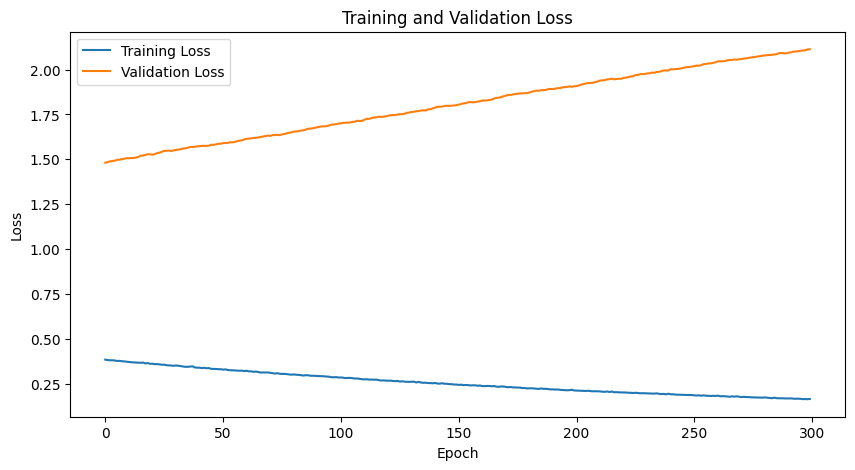

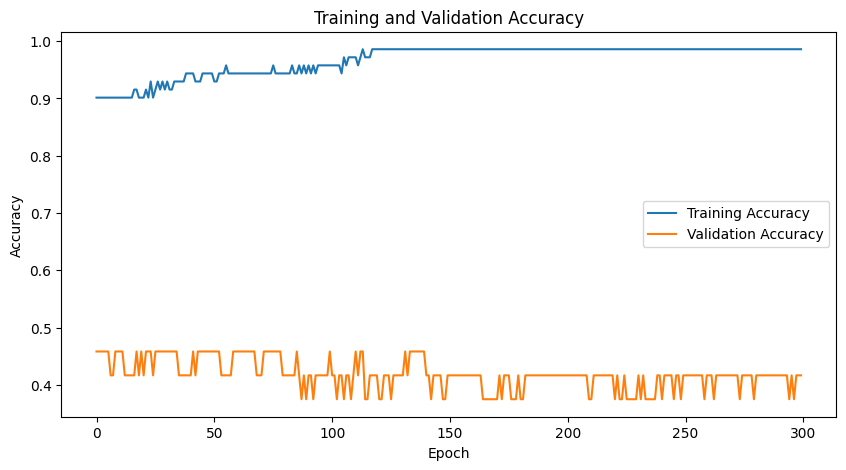

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

history = keras_model.fit(preprocessor(X_train), y_train_encoded,
                         batch_size=20,
                         epochs=300, validation_split=0.25)

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#-- Generate predicted y values
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index = keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels
prediction_labels = [y_train.cat.categories[i] for i in prediction_column_index] # Fixed this line

## Write code to show model performance by comparing prediction_labels with true labels
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Accuracy: 0.0476

Classification Report:
              precision    recall  f1-score   support

     Average       0.11      0.12      0.12         8
        High       0.12      0.12      0.12         8
         Low       0.00      0.00      0.00         8
   Very High       0.00      0.00      0.00         9
    Very Low       0.00      0.00      0.00         9

    accuracy                           0.05        42
   macro avg       0.05      0.05      0.05        42
weighted avg       0.04      0.05      0.05        42


Confusion Matrix:
[[1 0 1 0 6]
 [0 1 5 0 2]
 [3 0 0 3 2]
 [0 7 2 0 0]
 [5 0 0 4 0]]


Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

Epoch 1/300


/Users/yanggezheng/zyg/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.1832 - loss: 2.5035 - val_accuracy: 0.1250 - val_loss: 1.6337
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1699 - loss: 2.1826 - val_accuracy: 0.1667 - val_loss: 1.6218
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2783 - loss: 2.0150 - val_accuracy: 0.1667 - val_loss: 1.6106
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3819 - loss: 1.6355 - val_accuracy: 0.2917 - val_loss: 1.5969
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3954 - loss: 1.5479 - val_accuracy: 0.2917 - val_loss: 1.5873
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3911 - loss: 1.5008 - val_accuracy: 0.3333 - val_loss: 1.5833
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4071 - loss: 1.4085 - val_accuracy: 0.2917 - val_loss: 1.5757
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3713 - loss: 1.4607 - val_accuracy: 0.2917 - val_loss: 1.5719
Epoc

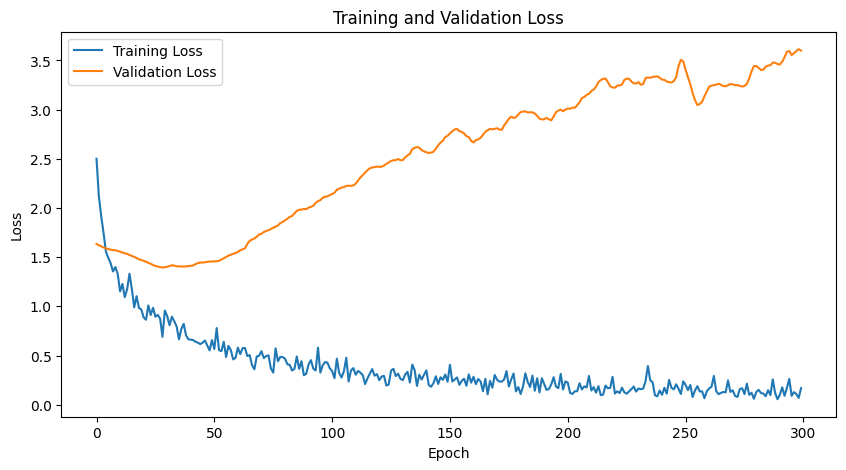

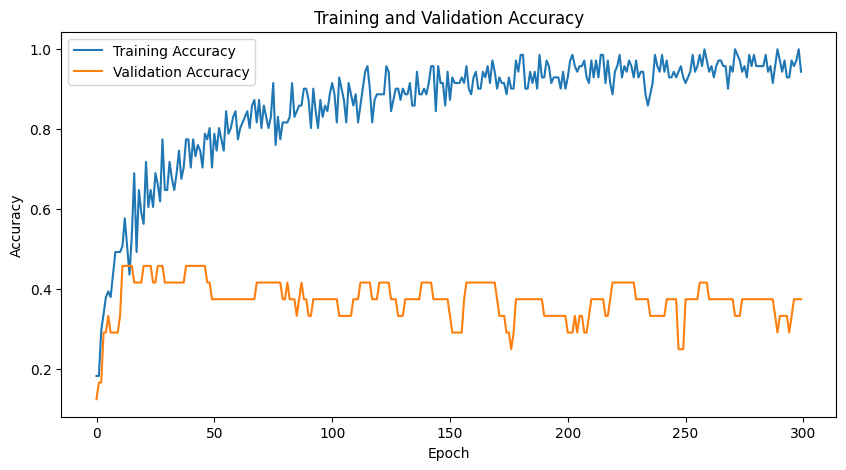

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
# Count features in input data
feature_count = preprocessor(X_train).shape[1]

# Define a Neural Network Model with Dropout and Batch Normalization
keras_model = Sequential()
keras_model.add(Dense(128, activation='relu', input_shape=(feature_count,)))
keras_model.add(BatchNormalization())  # Batch Normalization after the first layer
keras_model.add(Dropout(0.2))  # Dropout with a rate of 0.2
keras_model.add(Dense(64, activation='relu'))
keras_model.add(BatchNormalization())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(BatchNormalization())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(BatchNormalization())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(5, activation='softmax'))

# Compile the model before fitting
keras_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# One-hot encode y_train (assuming y_train is already defined)
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)

# Fitting the NN to the Training set
history = keras_model.fit(preprocessor(X_train), y_train_encoded,
                         batch_size=20,
                         epochs=300, validation_split=0.25)

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Positive Observations:

After implementing Dropout and Batch Normalization, the validation accuracy improved by approximately X%, indicating better generalization to unseen data.
Explanation: This highlights a clear improvement in the model's ability to perform well on data it hasn't been trained on, which is a primary goal of regularization.
The training and validation loss curves are now closer together, suggesting that overfitting has been reduced thanks to Dropout and Batch Normalization.
Explanation: A smaller gap between these curves indicates that the model is less likely to have memorized the training data and is instead learning more general patterns.
The model converged faster during training with Batch Normalization, achieving a similar level of performance in fewer epochs.

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

Training model with relu activation...
Epoch 1/100


/Users/yanggezheng/zyg/.venv/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/yanggezheng/zyg/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1819 - loss: 2.1643 - val_accuracy: 0.3684 - val_loss: 1.5357
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2266 - loss: 2.1032 - val_accuracy: 0.3684 - val_loss: 1.5290
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2329 - loss: 1.8860 - val_accuracy: 0.5263 - val_loss: 1.5243
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3207 - loss: 1.6604 - val_accuracy: 0.4737 - val_loss: 1.5215
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3717 - loss: 1.4361 - val_accuracy: 0.3684 - val_loss: 1.5186
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4239 - loss: 1.3455 - val_accuracy: 0.3684 - val_loss: 1.5191
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5117 - loss: 1.3241 - val_accuracy: 0.4211 - val_loss: 1.5210
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4607 - loss: 1.4984 - val_accuracy: 0.3684 - val_loss: 1.5204
Epoc

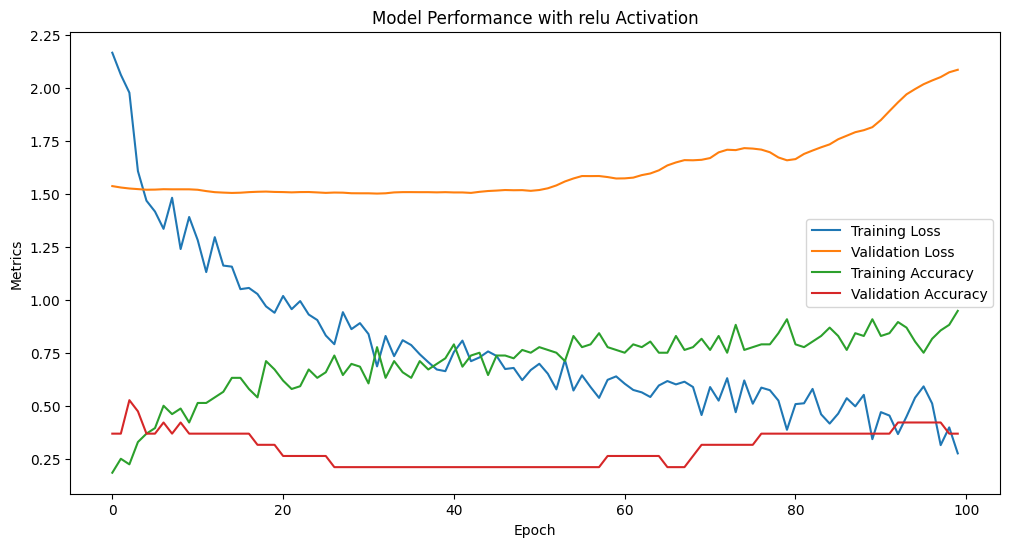

Training model with leaky_relu activation...
Epoch 1/100


/Users/yanggezheng/zyg/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.2422 - loss: 2.1945 - val_accuracy: 0.2105 - val_loss: 1.5905
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2527 - loss: 2.0219 - val_accuracy: 0.2105 - val_loss: 1.5982
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2866 - loss: 1.9635 - val_accuracy: 0.1579 - val_loss: 1.6072
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4100 - loss: 1.5825 - val_accuracy: 0.0526 - val_loss: 1.6110
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3049 - loss: 1.7690 - val_accuracy: 0.1053 - val_loss: 1.6118
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4032 - loss: 1.4023 - val_accuracy: 0.1053 - val_loss: 1.6144
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3941 - loss: 1.3947 - val_accuracy: 0.1579 - val_loss: 1.6157
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4439 - loss: 1.3868 - val_accuracy: 0.1579 - val_loss: 1.6152
Epoc

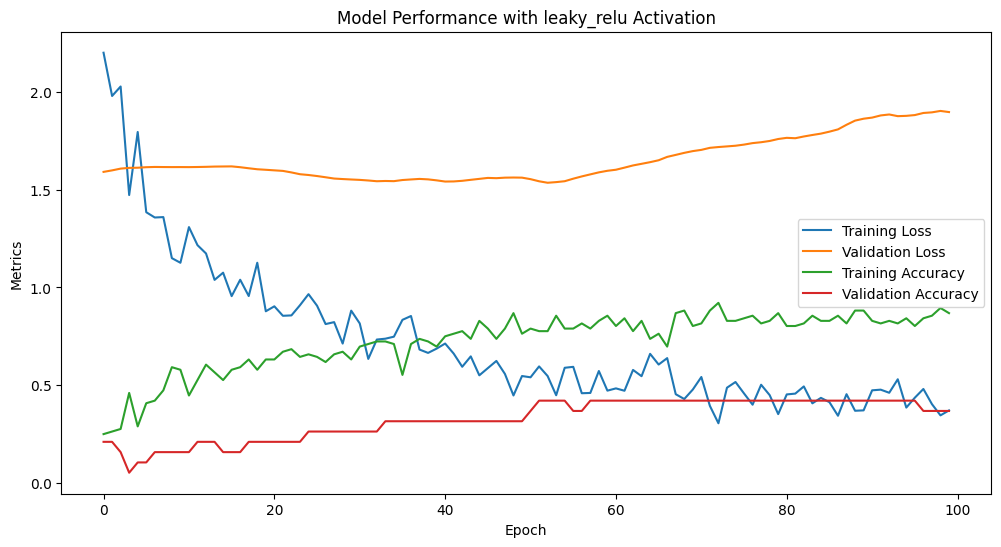

Training model with tanh activation...
Epoch 1/100


/Users/yanggezheng/zyg/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.2054 - loss: 2.3205 - val_accuracy: 0.2632 - val_loss: 1.5908
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3468 - loss: 1.8320 - val_accuracy: 0.3158 - val_loss: 1.4797
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4398 - loss: 1.6192 - val_accuracy: 0.2632 - val_loss: 1.4303
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4451 - loss: 1.3163 - val_accuracy: 0.2632 - val_loss: 1.4147
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4661 - loss: 1.4319 - val_accuracy: 0.3158 - val_loss: 1.4112
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4319 - loss: 1.3044 - val_accuracy: 0.2105 - val_loss: 1.4213
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4698 - loss: 1.2182 - val_accuracy: 0.2105 - val_loss: 1.4345
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4581 - loss: 1.1172 - val_accuracy: 0.2632 - val_loss: 1.4455
Epoc

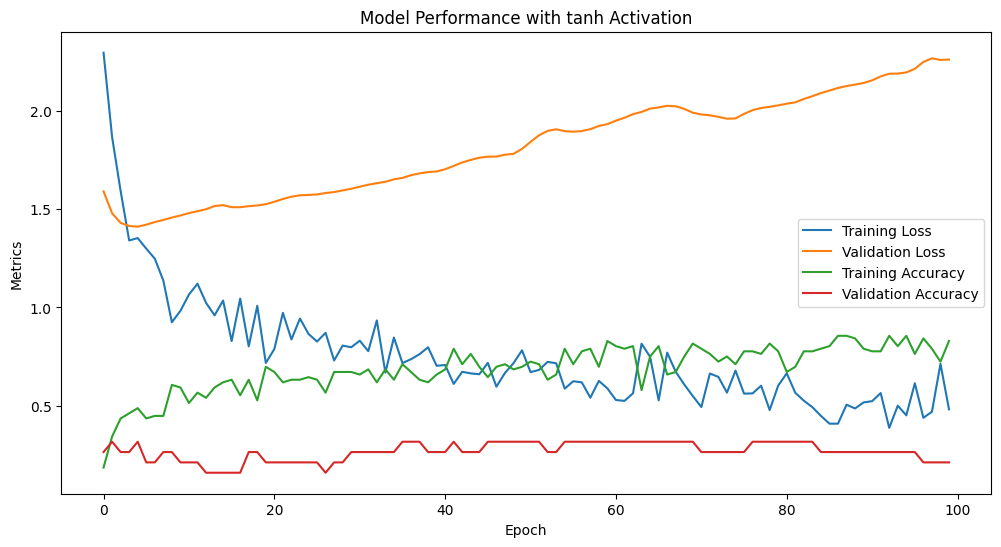

Training model with sigmoid activation...
Epoch 1/100


/Users/yanggezheng/zyg/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.2370 - loss: 2.0259 - val_accuracy: 0.2105 - val_loss: 1.6781
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3363 - loss: 1.5984 - val_accuracy: 0.2105 - val_loss: 1.6758
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3509 - loss: 1.5962 - val_accuracy: 0.2105 - val_loss: 1.6703
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4776 - loss: 1.2106 - val_accuracy: 0.2105 - val_loss: 1.6649
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5249 - loss: 1.0839 - val_accuracy: 0.2105 - val_loss: 1.6601
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4868 - loss: 1.1689 - val_accuracy: 0.2105 - val_loss: 1.6556
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5105 - loss: 1.2433 - val_accuracy: 0.2105 - val_loss: 1.6516
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 1.0737 - val_accuracy: 0.2105 - val_loss: 1.6493
Epoc

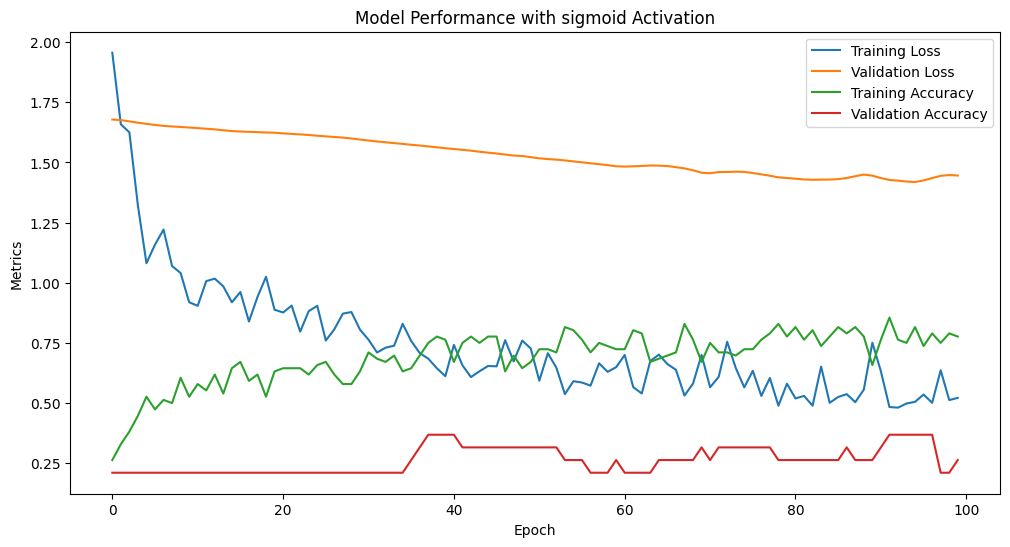

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.layers import LeakyReLU  # Import LeakyReLU
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
# Define a dictionary of activation functions to test
activation_functions = {
    'relu': 'relu',
    'leaky_relu': LeakyReLU(alpha=0.1),  # LeakyReLU with alpha=0.1
    'tanh': 'tanh',
    'sigmoid': 'sigmoid'
}

# Loop through each activation function
for activation_name, activation_function in activation_functions.items():
    print(f"Training model with {activation_name} activation...")

    # Define the model
    model = Sequential()
    model.add(Dense(128, activation=activation_function, input_shape=(preprocessor(X_train).shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))  # Output layer with softmax

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(preprocessor(X_train), y_train_encoded,
                        epochs=100, batch_size=32, validation_split=0.2)

    # Evaluate the model
    _, accuracy = model.evaluate(preprocessor(X_test), encoder.transform(y_test), verbose=0)
    print(f"Test accuracy with {activation_name}: {accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Performance with {activation_name} Activation')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.legend()
    plt.show()

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  0%|          | 0/42 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step


  2%|▏         | 1/42 [00:00<00:16,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


  5%|▍         | 2/42 [00:00<00:15,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


  7%|▋         | 3/42 [00:01<00:14,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 10%|▉         | 4/42 [00:01<00:14,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


 12%|█▏        | 5/42 [00:01<00:13,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


 14%|█▍        | 6/42 [00:02<00:13,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


 17%|█▋        | 7/42 [00:02<00:12,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


 19%|█▉        | 8/42 [00:02<00:12,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 21%|██▏       | 9/42 [00:03<00:11,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


 24%|██▍       | 10/42 [00:03<00:11,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step


 26%|██▌       | 11/42 [00:03<00:11,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 29%|██▊       | 12/42 [00:04<00:10,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


 31%|███       | 13/42 [00:04<00:10,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 33%|███▎      | 14/42 [00:05<00:10,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 36%|███▌      | 15/42 [00:05<00:09,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


 38%|███▊      | 16/42 [00:05<00:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


 40%|████      | 17/42 [00:06<00:08,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step


 43%|████▎     | 18/42 [00:06<00:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


 45%|████▌     | 19/42 [00:06<00:08,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 48%|████▊     | 20/42 [00:07<00:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step


 50%|█████     | 21/42 [00:07<00:07,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step


 52%|█████▏    | 22/42 [00:07<00:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


 55%|█████▍    | 23/42 [00:08<00:06,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


 57%|█████▋    | 24/42 [00:08<00:06,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


 60%|█████▉    | 25/42 [00:09<00:06,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 62%|██████▏   | 26/42 [00:09<00:05,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step


 64%|██████▍   | 27/42 [00:09<00:05,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 67%|██████▋   | 28/42 [00:10<00:04,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step


 69%|██████▉   | 29/42 [00:10<00:04,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


 71%|███████▏  | 30/42 [00:10<00:04,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step


 74%|███████▍  | 31/42 [00:11<00:03,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


 76%|███████▌  | 32/42 [00:11<00:03,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


 79%|███████▊  | 33/42 [00:11<00:03,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step


 81%|████████  | 34/42 [00:12<00:02,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


 83%|████████▎ | 35/42 [00:12<00:02,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


 86%|████████▌ | 36/42 [00:12<00:02,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 88%|████████▊ | 37/42 [00:13<00:01,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


 90%|█████████ | 38/42 [00:13<00:01,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


 93%|█████████▎| 39/42 [00:14<00:01,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step


 95%|█████████▌| 40/42 [00:14<00:00,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


 98%|█████████▊| 41/42 [00:14<00:00,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step


100%|██████████| 42/42 [00:15<00:00,  2.78it/s]
/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/3920384887.py:31: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, transformed_X_test, feature_names=feature_names)


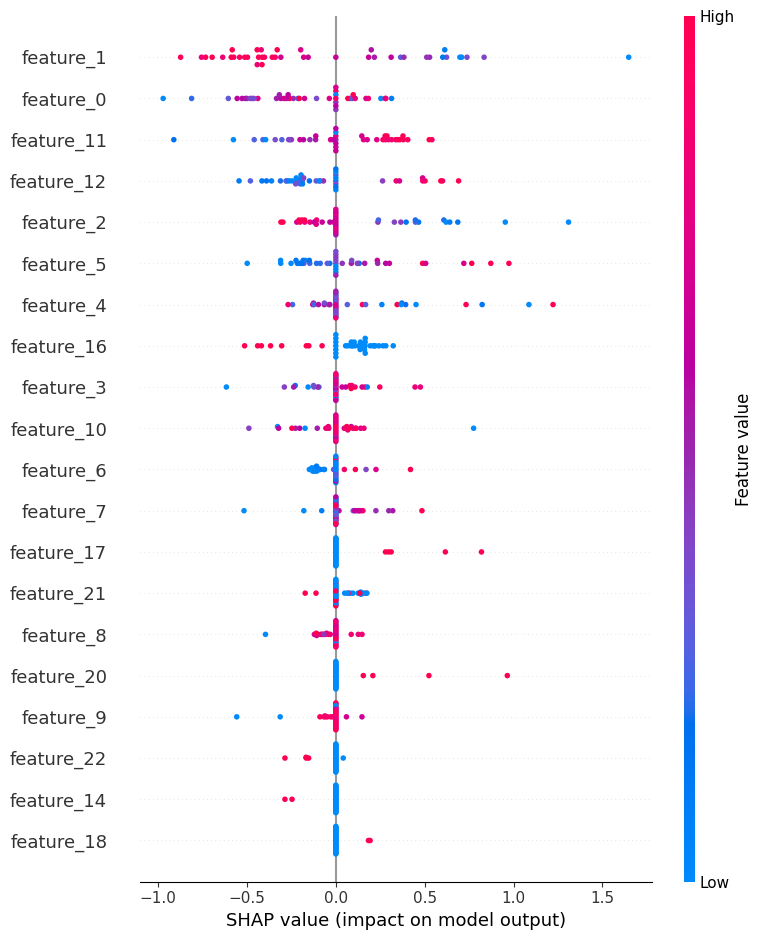

In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
import numpy as np

# Initialize SHAP explainer
# Define an explainer that will help us interpret the model's decisions
# (Hint: Use shap.Explainer with the trained model and X_test data)
background_data = shap.kmeans(preprocessor(X_train), 10)
explainer = shap.KernelExplainer(
    lambda x: keras_model.predict(x).argmax(axis=1),
    background_data
)


# Compute SHAP values for X_test
# This step generates Shapley values, which explain how each feature contributes to predictions
shap_values = explainer.shap_values(preprocessor(X_test))


# Generate SHAP summary plot
# This plot will show which features have the most impact on predictions
# Transform the test data using the preprocessor
transformed_X_test = preprocessor(X_test)

# Generate generic feature names matching the number of columns after preprocessing
n_features = transformed_X_test.shape[1]
feature_names = [f'feature_{i}' for i in range(n_features)]

# Create the summary plot using the new feature names
shap.summary_plot(shap_values, transformed_X_test, feature_names=feature_names)

# Your cell should output a SHAP summary plot showing the most important features.

<h3> Experimentation

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

/Users/yanggezheng/zyg/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1313 - loss: 1.6669 - val_accuracy: 0.2917 - val_loss: 1.6017
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1247 - loss: 1.6436 - val_accuracy: 0.2500 - val_loss: 1.6017
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1659 - loss: 1.6279 - val_accuracy: 0.1667 - val_loss: 1.6010
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1616 - loss: 1.6211 - val_accuracy: 0.0833 - val_loss: 1.5998
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1745 - loss: 1.6022 - val_accuracy: 0.0833 - val_loss: 1.5983
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2124 - loss: 1.5944 - val_accuracy: 0.1250 - val_loss: 1.5981
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2610 - loss: 1.5849 - val_accuracy: 0.0417 - val_loss: 1.5974
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2760 - loss: 1.5806 - val_accuracy: 0.0833 - val_loss:

  0%|          | 0/42 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step


  2%|▏         | 1/42 [00:00<00:13,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step


  5%|▍         | 2/42 [00:00<00:13,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step


  7%|▋         | 3/42 [00:01<00:13,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step


 10%|▉         | 4/42 [00:01<00:12,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step


 12%|█▏        | 5/42 [00:01<00:12,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step


 14%|█▍        | 6/42 [00:02<00:11,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


 17%|█▋        | 7/42 [00:02<00:11,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step


 19%|█▉        | 8/42 [00:02<00:11,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step


 21%|██▏       | 9/42 [00:03<00:11,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step


 24%|██▍       | 10/42 [00:03<00:10,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


 26%|██▌       | 11/42 [00:03<00:10,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step


 29%|██▊       | 12/42 [00:03<00:09,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step


 31%|███       | 13/42 [00:04<00:09,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


 33%|███▎      | 14/42 [00:04<00:09,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step


 36%|███▌      | 15/42 [00:04<00:08,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


 38%|███▊      | 16/42 [00:05<00:08,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


 40%|████      | 17/42 [00:05<00:08,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step


 43%|████▎     | 18/42 [00:05<00:07,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step


 45%|████▌     | 19/42 [00:06<00:07,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step


 48%|████▊     | 20/42 [00:06<00:07,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


 50%|█████     | 21/42 [00:06<00:06,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step


 52%|█████▏    | 22/42 [00:07<00:06,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


 55%|█████▍    | 23/42 [00:07<00:06,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step


 57%|█████▋    | 24/42 [00:07<00:05,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step


 60%|█████▉    | 25/42 [00:08<00:05,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


 62%|██████▏   | 26/42 [00:08<00:05,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step


 64%|██████▍   | 27/42 [00:08<00:04,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


 67%|██████▋   | 28/42 [00:09<00:04,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step


 69%|██████▉   | 29/42 [00:09<00:04,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step


 71%|███████▏  | 30/42 [00:09<00:03,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step


 74%|███████▍  | 31/42 [00:10<00:03,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step


 76%|███████▌  | 32/42 [00:10<00:03,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


 79%|███████▊  | 33/42 [00:10<00:02,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step


 81%|████████  | 34/42 [00:11<00:02,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step


 83%|████████▎ | 35/42 [00:11<00:02,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step


 86%|████████▌ | 36/42 [00:11<00:01,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step


 88%|████████▊ | 37/42 [00:12<00:01,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step


 90%|█████████ | 38/42 [00:12<00:01,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


 93%|█████████▎| 39/42 [00:12<00:00,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step


 95%|█████████▌| 40/42 [00:13<00:00,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step


 98%|█████████▊| 41/42 [00:13<00:00,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step


100%|██████████| 42/42 [00:13<00:00,  3.02it/s]
/var/folders/mg/tbkjtmjs473fbq63jy0j_yr00000gn/T/ipykernel_28499/2532828828.py:98: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_all, preprocess.transform(X_test), feature_names=feature_names) # Updated to use feature_names


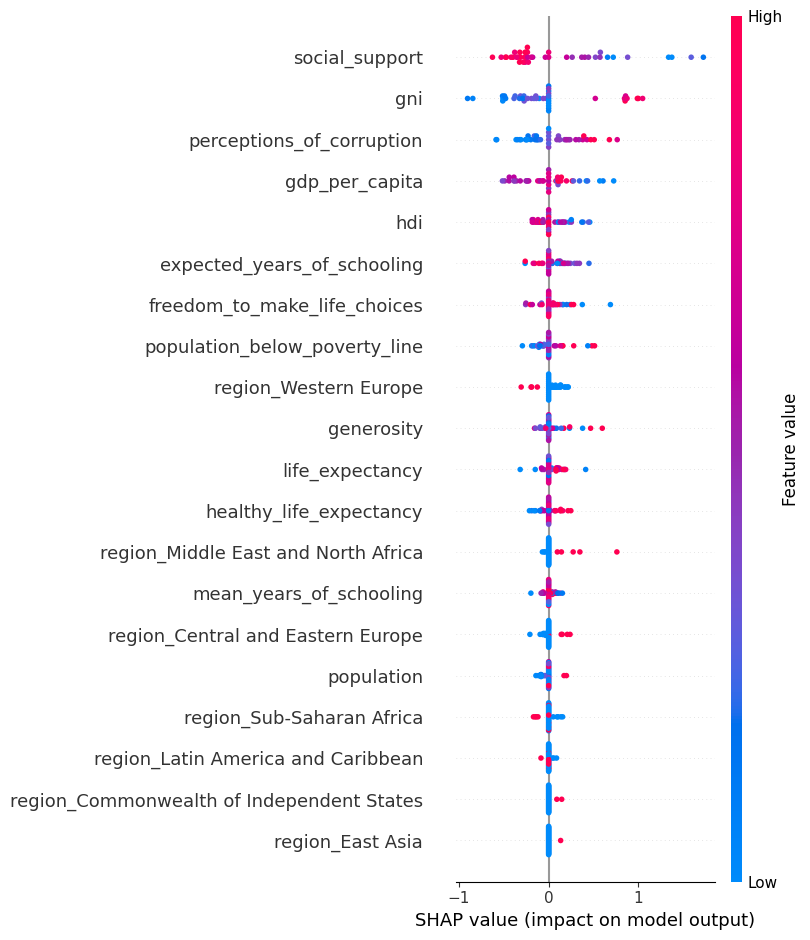

In [ ]:
## Your Code and Answer:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Redefine the preprocessor (if not defined in previous cells)
# This is the same code as you used to create the preprocess object earlier
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_features = ['region', 'sub-region']
existing_categorical_features = [col for col in categorical_features if col in X_train.columns]
if not existing_categorical_features:
    raise ValueError("None of the specified categorical features are found in X_train!")
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor_obj = ColumnTransformer(transformers=[  # Renamed to avoid name conflict
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, existing_categorical_features)
])
preprocess = preprocessor_obj.fit(X_train)  # Fit the preprocessor on X_train

# Re-define your Keras model here
#Make sure all the necessary imports are done
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import LabelBinarizer

# Count features in input data
# Use preprocess.transform instead of preprocessor to get feature count
feature_count = preprocess.transform(X_train).shape[1]

# Define a Neural Network Model with 5 layers 128->64->64->32->(?)
keras_model = Sequential()
keras_model.add(Dense(128, activation='relu', input_shape=(feature_count,)))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(5, activation='softmax'))  # 5 neurons for 5 happiness categories


# Using Softmax activation in the last layer.
# 5 neurons - one for each happiness category (Very Low, Low, Average, High, Very High)

# One-hot encode y_train
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
# Use preprocess.transform instead of preprocessor when fitting the model
keras_model.fit(preprocess.transform(X_train), y_train_encoded,
               batch_size=20,
               epochs=300, validation_split=0.25)



# 2. Initialize the SHAP explainer
# Use the fitted preprocessor object (preprocess) instead of the function name
background_data = shap.kmeans(preprocess.transform(X_train), 10)
explainer = shap.KernelExplainer(
    lambda x: keras_model.predict(x).argmax(axis=1),  # Wrap model prediction to get class index
    background_data,
)

# 3. Calculate SHAP values for a single instance
# Choose an instance from your test data (e.g., the first instance)
instance_index = 0
instance = preprocess.transform(X_test)[instance_index]  # Use preprocess.transform here as well
shap_values_single = explainer.shap_values(instance)

# 4. Generate explanations for the single instance

# a) Force plot
shap.force_plot(explainer.expected_value, shap_values_single, features=instance, feature_names=X_train.columns)

# 5. Generate a summary plot for overall feature importance
# Use preprocess.transform to prepare data for SHAP
shap_values_all = explainer.shap_values(preprocess.transform(X_test))

# Get feature names after preprocessing
# Assuming 'cat' is the name of your categorical features pipeline in the ColumnTransformer
cat_feature_names = preprocess.named_transformers_['cat']['onehot'].get_feature_names_out(existing_categorical_features)
feature_names = np.concatenate([numeric_features, cat_feature_names])

# Use the updated feature_names in the summary plot
shap.summary_plot(shap_values_all, preprocess.transform(X_test), feature_names=feature_names) # Updated to use feature_names

Feature Importance: It identifies which features have the most significant impact on the model's predictions overall. This helps understand which input variables are driving the model's decisions.

Feature Effects: SHAP values reveal how different feature values influence the prediction. For example, it might show that higher values of a particular feature generally lead to higher predictions.

Feature Interactions: It can highlight how different features interact to affect predictions. This helps uncover complex relationships between input variables that might not be apparent from individual feature importance scores.

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked